# 4.4 - Veri Temizliği 3: Aşırı Değerler
Bu ödevde ABD Eğitim Sistemi'ne ait [verileri](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) inceleyemeye devam edeceksiniz. Bu veri kümesinde eyalet bazında yıllık bir çok veri bulunmaktadır. Bu verilerin açıklamalarına yine Kaggle'dan ulaşabilirsiniz.

Öncelikle bir önceki derste uyguladağınız eksik değerleri tamamlama tekniklerinden en uygun olanını uygulayın. Aşağıdaki sorulara cevap verebilmeniz için eksik verilerin üstesinden gelmelisiniz.

1. Toplam gelir verilerini içeren TOTAL_REVENUE ve toplam harcama verilerini içeren TOTAL_EXPENDITURE değişkenlerini inceleyin. Bu değişkenler aykırı değerler içeriyor mu?

2. Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

3. Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temizlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

4. Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temizledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

5. Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

6. Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

# Cevap 1:

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

education = pd.read_csv("states_all.csv")
education.iloc[100:105,1:9]    # örnek data frame kesiti

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE
100,WISCONSIN,1993,829085.0,5357945.0,226234.0,2205644.0,2926067.0,5640718.0
101,WYOMING,1993,100313.0,615130.0,35437.0,308683.0,271010.0,614807.0
102,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0
103,ALASKA,1994,123868.0,1052282.0,134168.0,668229.0,249885.0,1116160.0
104,ARIZONA,1994,708482.0,3566586.0,348847.0,1478372.0,1739367.0,3803379.0


### Çalışacağımız değişkenlerdeki boş değerleri kontol edip dolduralım.

In [18]:
print("TOTAL_REVENUE değişkeninde toplam NULL değer sayısı:", education["TOTAL_REVENUE"].isnull().sum())
print("TOTAL_EXPENDITURE değişkeninde toplam NULL değer sayısı:", education["TOTAL_EXPENDITURE"].isnull().sum())

TOTAL_REVENUE değişkeninde toplam NULL değer sayısı: 440
TOTAL_EXPENDITURE değişkeninde toplam NULL değer sayısı: 440


In [19]:
# NULL değerleri dolduralım.
for i in ("TOTAL_EXPENDITURE", "TOTAL_REVENUE"):
    fill_with = education[i].interpolate(method="linear")
    education[i].fillna(fill_with, inplace=True)

In [20]:
print("TOTAL_REVENUE değişkeninde toplam NULL değer sayısı:", education["TOTAL_REVENUE"].isnull().sum())
print("TOTAL_EXPENDITURE değişkeninde toplam NULL değer sayısı:", education["TOTAL_EXPENDITURE"].isnull().sum())

TOTAL_REVENUE değişkeninde toplam NULL değer sayısı: 0
TOTAL_EXPENDITURE değişkeninde toplam NULL değer sayısı: 0


---

### Histogram ile aşırı değer kontrolü:
Histogram ile aşırı değer kontrolü hatalı fikir verebiliyor. Çok da tavsiye edilmedi. 

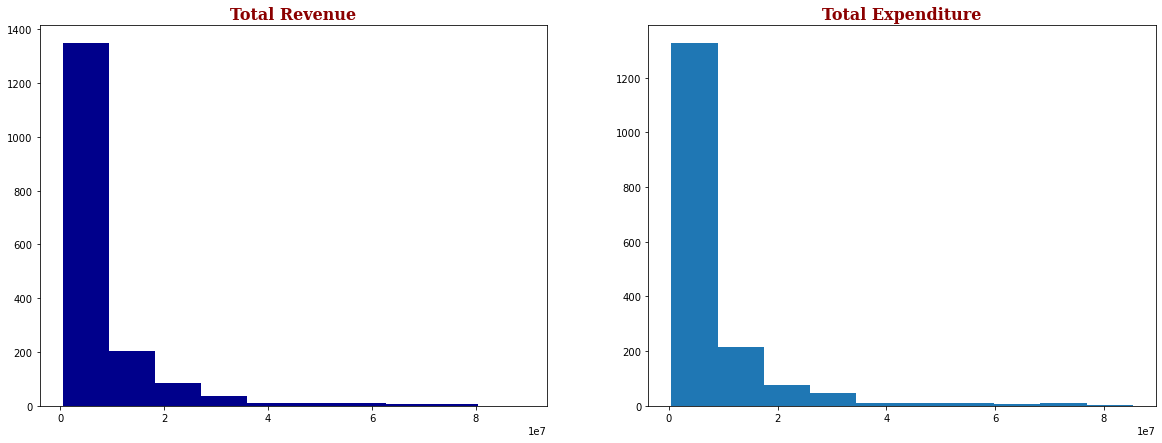

In [21]:
title_font = {"family":"serif", "weight":"bold", "color":"darkred", "size":16}
axis_font = {"family":"arial", "weight":"normal", "color":"red", "size":13}
 
# education.TOTAL_EXPENDITURE = education["TOTAL_EXPENDITURE"][~np.isnan(education["TOTAL_EXPENDITURE"])]
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.hist(education.TOTAL_REVENUE, color="darkblue")
plt.title("Total Revenue", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(education["TOTAL_EXPENDITURE"])
plt.title("Total Expenditure", fontdict=title_font)
plt.show()

### Kutu grafiği ile aşırı değer kontrolü 

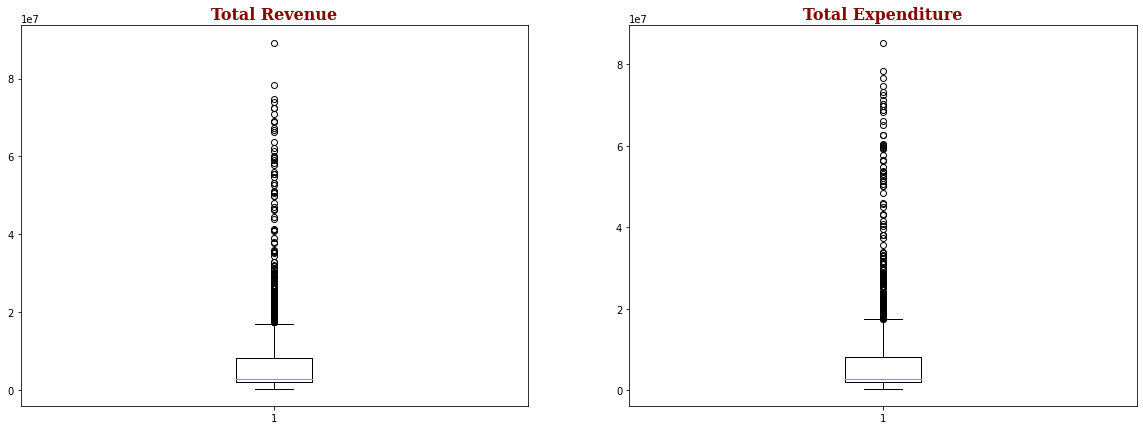

In [22]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(education.TOTAL_REVENUE, whis=None)
plt.title("Total Revenue", fontdict=title_font)

plt.subplot(1,2,2)
plt.boxplot(education["TOTAL_EXPENDITURE"], whis=None)
plt.title("Total Expenditure", fontdict=title_font)
plt.show()

### Z-score ile aşırı değer kontrolü 

In [23]:
from scipy.stats import zscore


for j in ("TOTAL_REVENUE", "TOTAL_EXPENDITURE"):
    zscores = zscore(education[j])
    print(f"{j} Değişkeni:")
    for threshold in range(1,6):
        print(f"Eşik değer: {threshold}")
        print(f"Aykırı değer sayısı: {len(np.where(zscores > threshold)[0])}")
    print("\n")

TOTAL_REVENUE Değişkeni:
Eşik değer: 1
Aykırı değer sayısı: 170
Eşik değer: 2
Aykırı değer sayısı: 72
Eşik değer: 3
Aykırı değer sayısı: 43
Eşik değer: 4
Aykırı değer sayısı: 33
Eşik değer: 5
Aykırı değer sayısı: 15


TOTAL_EXPENDITURE Değişkeni:
Eşik değer: 1
Aykırı değer sayısı: 164
Eşik değer: 2
Aykırı değer sayısı: 68
Eşik değer: 3
Aykırı değer sayısı: 44
Eşik değer: 4
Aykırı değer sayısı: 33
Eşik değer: 5
Aykırı değer sayısı: 16




### Tukey Yöntemi ile aşırı değer kontrolü 

In [24]:
df_R, df_E = (pd.DataFrame(),)*2    # Değişkenler için yaratılan boş DataFrame'ler

for j in ("TOTAL_REVENUE", "TOTAL_EXPENDITURE"):
    Q25, Q75 = np.percentile(education[j], (25,75))
    IQR = Q75 - Q25

    for threshold in np.arange(1,5,0.5):
        min_value = Q25 - (IQR*threshold)
        max_value = Q75 + (IQR*threshold)
        fliers = len(np.where((education[j] < min_value) | (education[j] > max_value))[0])
        if j == "TOTAL_REVENUE":
            df_R = df_R.append({"Eşik Değer":threshold, "Aşırı Değer Sayısı":fliers}, ignore_index=True)
        elif j == "TOTAL_EXPENDITURE":
            df_E = df_E.append({"Eşik Değer":threshold, "Aşırı Değer Sayısı":fliers}, ignore_index=True)

print("Total_REVENUE değişkeni değerleri:")            
display(df_R)
print("Total_EXPENDITURE değişkeni değerleri:")            
display(df_E)

Total_REVENUE değişkeni değerleri:


,Aşırı Değer Sayısı,Eşik Değer
0,227.0,1.0
1,180.0,1.5
2,137.0,2.0
3,112.0,2.5
4,86.0,3.0
5,64.0,3.5
6,52.0,4.0
7,47.0,4.5


Total_EXPENDITURE değişkeni değerleri:


,Aşırı Değer Sayısı,Eşik Değer
0,222.0,1.0
1,174.0,1.5
2,137.0,2.0
3,110.0,2.5
4,90.0,3.0
5,62.0,3.5
6,54.0,4.0
7,49.0,4.5


### Grafiklerden ve kullanılan yöntemlerden görülebileceği üzere, <br> belli bir yığılma ile birlikte aykırı değerler de mevcut.

\## Excel'deki gibi Üst Sütun (merge cells) yapılabilir mi, onu denedim fakat olmadı.

df_Tukey = pd.DataFrame(columns=["TOTAL_REVENUE", "TOTAL_EXPENDITURE"])

for j in ("TOTAL_REVENUE", "TOTAL_EXPENDITURE"):
    Q25, Q75 = np.percentile(education[j], (25,75))
    IQR = Q75 - Q25

    for threshold in np.arange(1,5,0.5):
        min_value = Q25 - (IQR*threshold)
        max_value = Q75 + (IQR*threshold)
        fliers = len(np.where((education[j] < min_value) | (education[j] > max_value))[0])
        df_Tukey = df_Tukey.append({j:{"Eşik Değer":threshold, "Aşırı Değer Sayısı":fliers}}, ignore_index=True)
        
df_Tukey

# Cevap 2:
Toplam gelir (TOTAL_REVENUE) ve toplam harcama (TOTAL_EXPENDITURE) değişkenlerinde aykırı değer tespit ettiyseniz bu derste öğrendiğiniz teknikleri uygulayarak bu aykırı değerleri ortadan kaldırın ve bunu yaptıktan sonra hiçbir aykırı değer kalmadığını doğrulayın.

In [25]:
from scipy.stats.mstats import winsorize

clean_REVENUE = winsorize(education["TOTAL_REVENUE"], (0, 0.11))
clean_EXPENDITURE = winsorize(education["TOTAL_EXPENDITURE"], (0, 0.11))

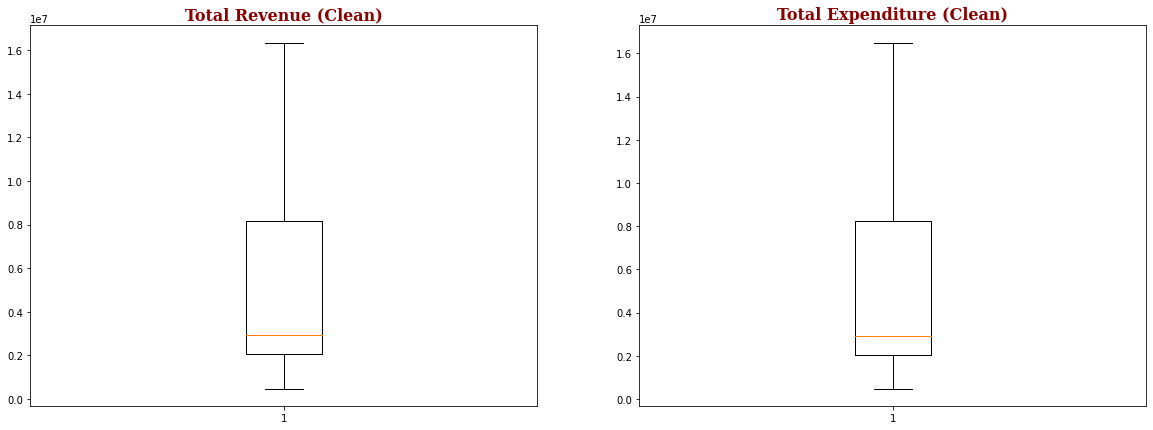

In [26]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(clean_REVENUE, whis=None, vert=True)
plt.title("Total Revenue (Clean)", fontdict=title_font)

plt.subplot(1,2,2)
plt.boxplot(clean_EXPENDITURE, whis=None, vert=True)
plt.title("Total Expenditure (Clean)", fontdict=title_font)
plt.show()
## Aşağıdaki kutu grafikleri, sağa çarpık.

### Kutu grafiklerden görülebileceği üzere, aşırı değerler, tek yönlü winsorize edilerek temizlenmiştir. Verilerin %89'luk dilimi kullanılmıştır. 

# Cevap 3:
Toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama (TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun (aykırı değerleri temizlemeden). Bu yeni değişkende de aykırı değerler yer almakta mı? Varsa bu aykırı değerleri de temizleyin.

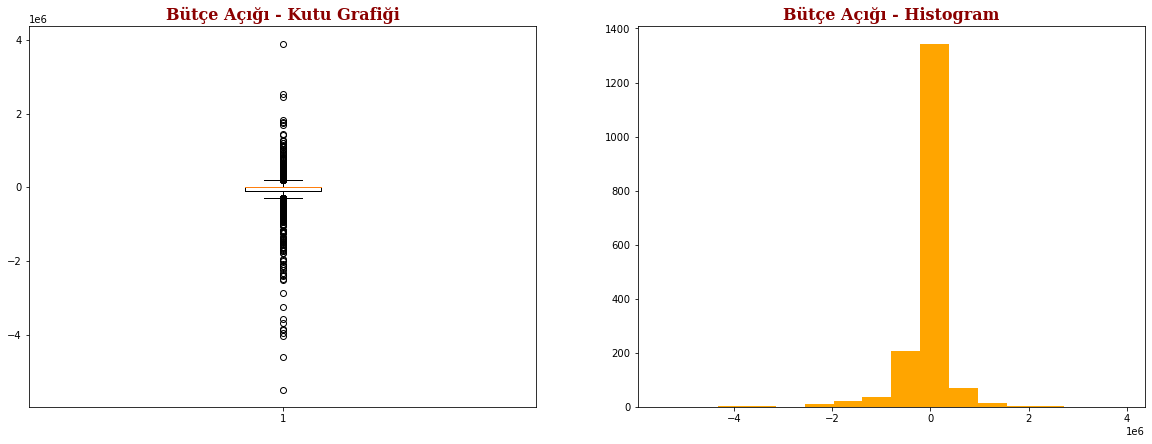

In [27]:
education["BUDGET_DEFICIT"] = education.TOTAL_REVENUE - education.TOTAL_EXPENDITURE    # CSV dosyasına, BÜTÇE_AÇIĞI sütunu eklendi.

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(education.BUDGET_DEFICIT, whis=None)
plt.title("Bütçe Açığı - Kutu Grafiği", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(education.BUDGET_DEFICIT, color="orange", bins=16)
plt.title("Bütçe Açığı - Histogram", fontdict=title_font)
plt.show()

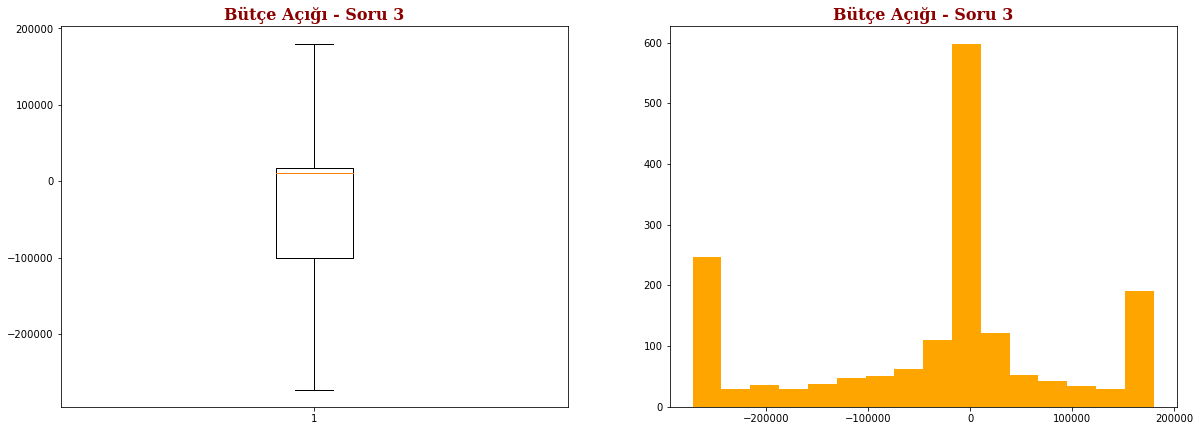

In [28]:
clean_DEFICIT = winsorize(education["BUDGET_DEFICIT"], (0.13, 0.10))

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(clean_DEFICIT, whis=None)
plt.title("Bütçe Açığı - Soru 3", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(clean_DEFICIT, color="orange", bins=16)
plt.title("Bütçe Açığı - Soru 3", fontdict=title_font)
plt.show()

### Grafiklerden görülebileceği üzere, _Bütçe Açığı_ değişkeni de aşırı değerlere sahiptir. Düşük değerlerin %13'ü, yüksek değerlerin %10'u, çift yönlü winsorize edilerek temizlenmiştir.

# Cevap 4:
Yine toplam gelir (TOTAL_REVENUE) değişkeninden, toplam harcama(TOTAL_EXPENDITURE) değerini çıkartarak bütçe açığı olarak düşünülebilecek bir değişken oluşturun. Fakat bu sefer aykırı değerleri temizledikten sonra bu işlemi yapın. Bu yeni değişkende de aykırı değerler var mı? Varsa bunları da temizlemekte fayda var.

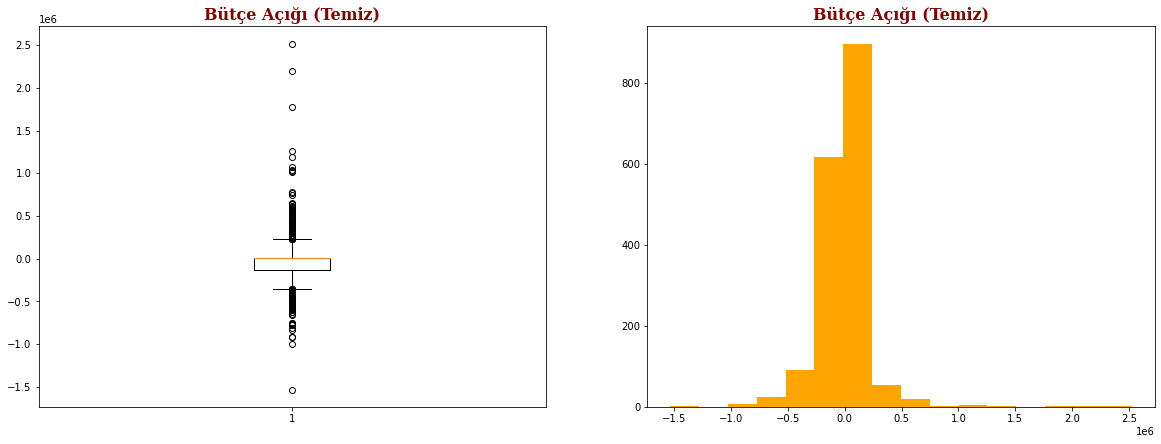

In [29]:
education["CLEAN_BUDGET_DEFICIT"] = clean_REVENUE - clean_EXPENDITURE    # CSV dosyasına, TEMİZ_BÜTÇE_AÇIĞI sütunu eklendi.

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(education.CLEAN_BUDGET_DEFICIT, whis=None)
plt.title("Bütçe Açığı (Temiz)", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(education.CLEAN_BUDGET_DEFICIT, color="orange", bins=16)
plt.title("Bütçe Açığı (Temiz)", fontdict=title_font)
plt.show()
## Bu grafikler, sola çarpık değil mi?

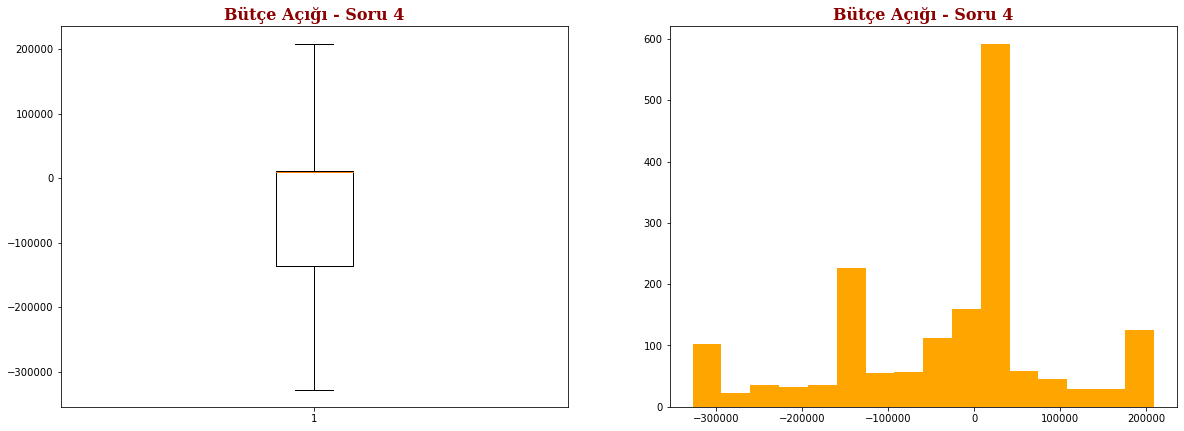

In [30]:
clean_DEFICIT_2 = winsorize(education["CLEAN_BUDGET_DEFICIT"], (0.05, 0.06))

plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.boxplot(clean_DEFICIT_2, whis=None)
plt.title("Bütçe Açığı - Soru 4", fontdict=title_font)

plt.subplot(1,2,2)
plt.hist(clean_DEFICIT_2, color="orange", bins=16)
plt.title("Bütçe Açığı - Soru 4", fontdict=title_font)
plt.show()

### Grafiklerden görülebileceği üzere, _Temiz Bütçe Açığı_ değişkeni de hala aşırı değerlere sahiptir. Düşük değerlerin %5'i, yüksek değerlerin %6'sı, çift yönlü winsorize edilerek temizlenmiştir.

# Cevap 5:
Şimdi elimizde üçüncü ve ve dördüncü sorularda oluşturduğumuz iki farklı bütçe değişkeni var. Bu ikisi arasında fark görüyor musunuz?

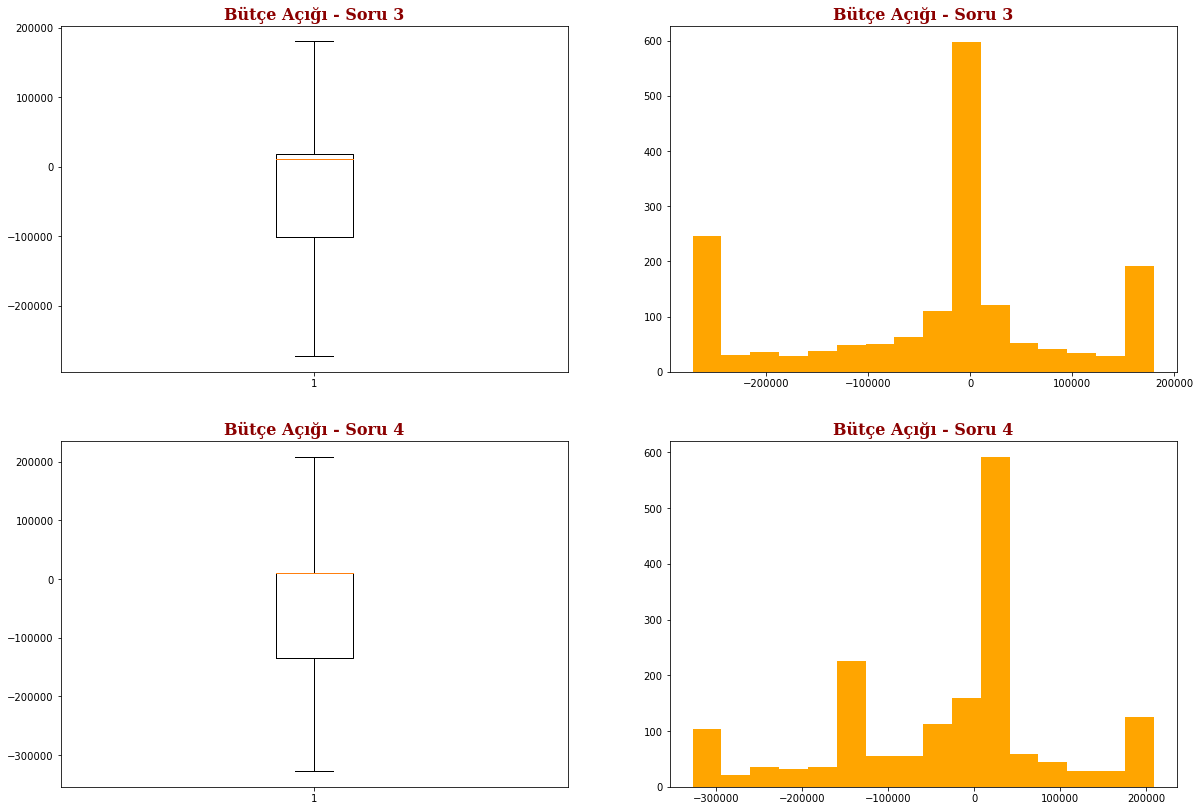

In [31]:
plt.figure(figsize=(20,14))
plt.subplot(2,2,1)
plt.boxplot(clean_DEFICIT, whis=None)
plt.title("Bütçe Açığı - Soru 3", fontdict=title_font)

plt.subplot(2,2,2)
plt.hist(clean_DEFICIT, color="orange", bins=16)
plt.title("Bütçe Açığı - Soru 3", fontdict=title_font)

plt.subplot(2,2,3)
plt.boxplot(clean_DEFICIT_2, whis=None)
plt.title("Bütçe Açığı - Soru 4", fontdict=title_font)

plt.subplot(2,2,4)
plt.hist(clean_DEFICIT_2, color="orange", bins=16)
plt.title("Bütçe Açığı - Soru 4", fontdict=title_font)
plt.show()

### Üçüncü soru grafiğinin dağılımları, dördüncü soru grafik dağılımına göre daha normal bir dağılım sergilemiştir.

\## Normal dağılımın burada bir önemi yok. Asıl önemli olan, **Soru-3** grafiğindeki sınırlar yaklaşık olarak 200.000 ile -250.000 arasındayken, **Soru-4** grafiğinde daha geniş, -300.000 civarında. Dolayısıyla Soru-4'te daha az manipülasyon yapılarak daha fazla aşırı değerden kurtulunmuş, yani daha iyi sonuç alınmıştır.

# Cevap 6:
Bizim için bütçe açığı çok önemli bir değişken olsaydı aykırı değerleri temizlemek için hangi yöntem daha iyi olurdu. Üçüncü soruda uguladığınız yöntem mi yoksa dördüncü sorudaki yöntem mi?

#### Cevapları hatırlayalım:
**3\. Soru cevabı:** Grafiklerden görülebileceği üzere, _Bütçe Açığı_ değişkeni de aşırı değerlere sahiptir. Düşük değerlerin %13'ü, yüksek değerlerin %10'u, çift yönlü winsorize edilerek temizlenmiştir. <br>
**4\. Soru cevabı:** Grafiklerden görülebileceği üzere, _Temiz Bütçe Açığı_ değişkeni de hala aşırı değerlere sahiptir. Düşük değerlerin %5'i, yüksek değerlerin %6'sı, çift yönlü winsorize edilerek temizlenmiştir. <br>

Üçüncü soruda, toplam veriler üzerinden **%23**'lük bir düzeltme yaptık; verileri 1 kere manipüle ettik. Dördüncü sorudaysa, toplamda **%22**'lik bir düzeltme uyguladık fakat verileri 2 kere manipüle ettik. Eğer _Bütçe Açığı_ bizim için önemli bir değişken olsaydı, en iyi yaklaşım, verilerin en azını manipüle ederek en iyi temizleme metodunu uygulamak olacaktır.

Dolayısıyla, Cevap-5'te yazdığım gibi, 